In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)


## Reading the application_data

In [4]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
df=pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Check the number of rows and columns in the dataframe
df.shape

(307511, 122)

In [6]:
#check for duplicate value
df.duplicated().sum()

0

In [7]:
# Check for the null values
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### Cleaning the missing values

In [8]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

*There are 64 columns having missing values greater than 30%.We will remove those columns as it is not feasable to impute missing values for those columns.* 

In [9]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [10]:
df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 2
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START      0
HOUR_APPR_PROC

 *'AMT_ANNUITY', column is having very few null values rows. Hence let's try to impute the missing values.*
*'CNT_FAM_MEMBERS' has only two data missing and 'DAYS_LAST_PHONE_CHANGE' has only one data missing which we can ignore.*

In [11]:
df.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

*we will impute the values with median value as the data has outliers*

In [12]:
df.loc[df.AMT_ANNUITY.isnull(),'AMT_ANNUITY']=df.AMT_ANNUITY.median()
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [13]:
# Checking rows having null values greater than or equal to 30%
emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [14]:
# We will remove unwanted columns from this dataset
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
       'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
       'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

*Some columns contain 'XNA' value which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.*

In [15]:
# checking categorical columns having these 'XNA' values
# Gender column
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

*only four rows in the column 'CODE_GENDER' contains 'XNA' value which can be replaced with 'F' as F count is more and hence there won't be much impact on the data set.*

In [16]:
df['CODE_GENDER'].replace(['XNA'], ['F'], inplace=True)
df.CODE_GENDER.unique()

array(['M', 'F'], dtype=object)

In [17]:
# For Organization column
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 29)

In [18]:
df.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [19]:
#percentage of XNA values present 
55374/307511*100

18.00716071945394

*XNA value present in ORGANIZATION_TYPE is 18% of the total value which is quite less and hence we can drop XNA value without having much impact on the data analysis.*


In [20]:
# Hence, dropping the rows having 'XNA' values in the ORGANIZATION_TYPE column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 29)

In [21]:
display(df.dtypes) 

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
CNT_FAM_MEMBERS                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY   

In [22]:
# Converting  all  variable into numeric datatype

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                 'REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
                 'DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 
                 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,THURSDAY,11,0,0,0,0,1,1,Religion


 Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [23]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,
        325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000',
        '150000-175000','175000-200000','200000-225000','225000-250000','250000-275000',
        '275000-300000','300000-325000','325000-350000','350000-375000','375000-400000',
        '400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins=bins,labels=slot)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,MONDAY,11,0,0,0,0,0,0,School,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,MONDAY,9,0,0,0,0,0,0,Government,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000


In [24]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,
        750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', 
         '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000',
         '600000-650000','650000-700000','700000-750000','750000-800000','800000-850000',
         '850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,MONDAY,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,MONDAY,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


In [34]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties)
#and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]


In [35]:
target1_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1.0,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,100000-125000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,2.0,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,200000-225000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,2.0,THURSDAY,11,0,0,0,0,0,0,Self-employed,125000-150000,250000-300000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,-10199,-2015,-4802.0,-1038,1.0,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,300000-325000,900000 and above


In [37]:
target0_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,2.0,MONDAY,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1.0,MONDAY,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,75000-100000,450000-500000


In [38]:
# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.55

The Imbalance ratio is 10.55

## Univariate analysis 

 ***Doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)***

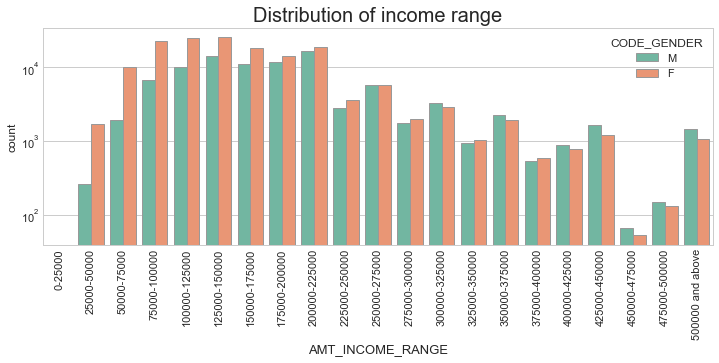

In [39]:
# PLotting for income range
pd.set_option('display.max_colwidth', -1)
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[12,4])

sns.countplot(data=target0_df,x=df['AMT_INCOME_RANGE'],hue=df['CODE_GENDER'],edgecolor=".6",
              palette="Set2")

plt.title('Distribution of income range',fontsize=20)
plt.xlabel('AMT_INCOME_RANGE',fontsize=13)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Observations**
1. Income range from 75000-100000 to 200000-225000 is having more in number.
2. Very less count for income range 400000 and above.
3. Female counts are higher than male

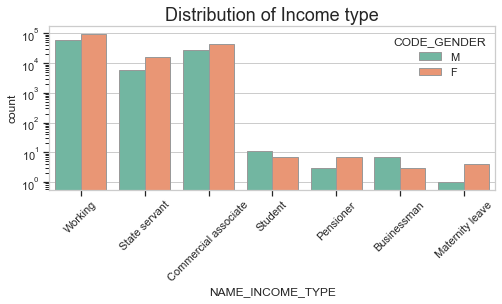

In [40]:
# Plotting for Income type
pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-whitegrid')
sns.set_context('notebook')
plt.figure(figsize=[8,3])

sns.countplot(data=target0_df,x=df['NAME_INCOME_TYPE'],hue=df['CODE_GENDER'],color='y',
              edgecolor=".6",palette='Set2')

plt.title('Distribution of Income type',fontsize=18)
plt.xlabel('NAME_INCOME_TYPE',fontsize=12)

plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observations**
1. Income type ‘working’, ’commercial associate’, and ‘State Servant’ the number are higher than others.
2. Income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ are less in number.
3. Female counts are higher than male

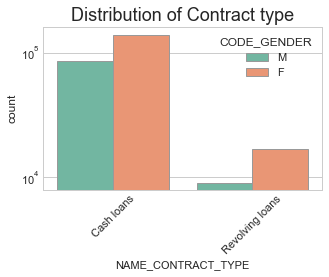

In [41]:
# Plotting for Contract type
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[5,3])

sns.countplot(data=target0_df,x=df['NAME_CONTRACT_TYPE'],hue=df['CODE_GENDER'],color='c',
              edgecolor=".6",palette="Set2")

plt.title('Distribution of Contract type',fontsize=18)
plt.xlabel('NAME_CONTRACT_TYPE',fontsize=11)

plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observations**
1. Contract type ‘cash loans’ is having higher number  than ‘Revolving loans’ contract type.
2. Female counts are higher than male

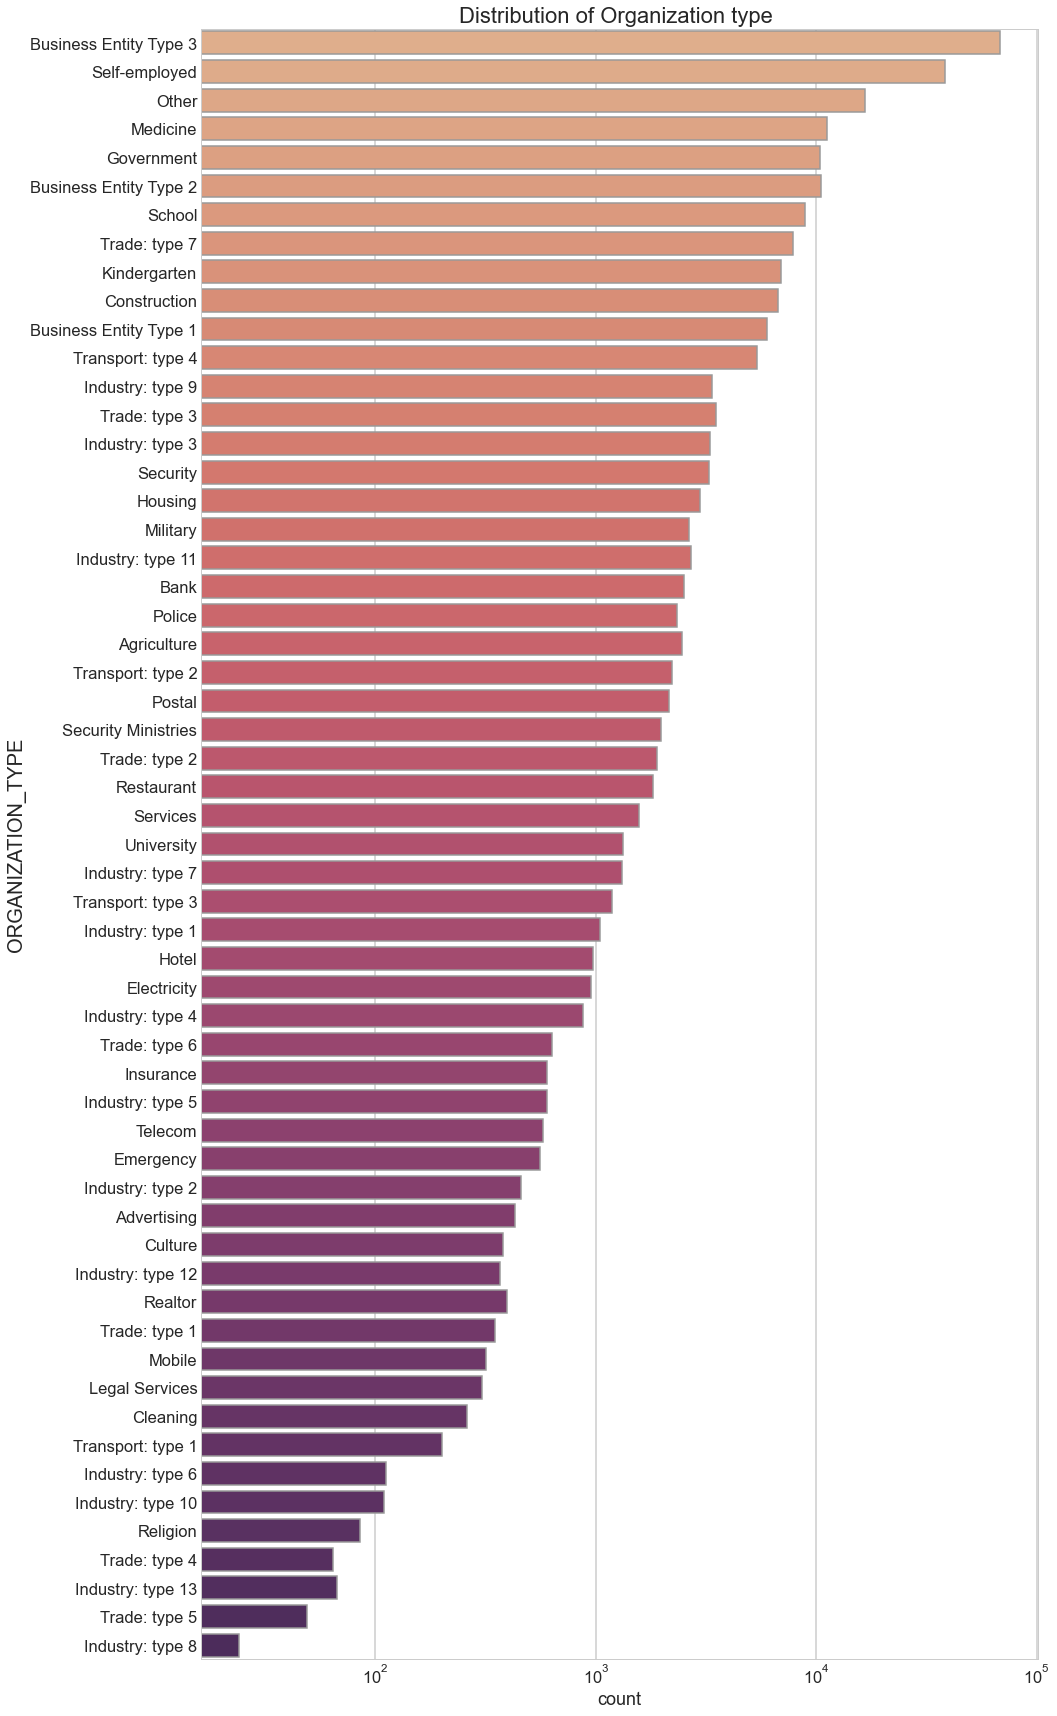

In [42]:
# Plotting for Organization type
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,30])

sns.countplot(data=target0_df,y=df['ORGANIZATION_TYPE'],order=target0_df['ORGANIZATION_TYPE'].value_counts().index,
              color='c',edgecolor=".6",palette="flare")

plt.title('Distribution of Organization type ',fontsize=22)
plt.ylabel('ORGANIZATION_TYPE',fontsize=20)

plt.xticks(rotation=0)
plt.xscale('log')

plt.show()

**Observations**
1. Most clients are from the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8, Trade type 5, Industry type 13, Trade type 4, Religion and Industry type 10  .

***Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)***

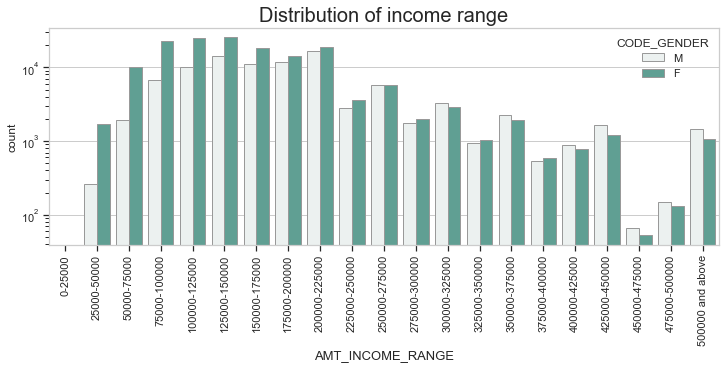

In [43]:
# PLotting for income range
pd.set_option('display.max_colwidth', -1)
sns.set_context('notebook')
plt.figure(figsize=[12,4])

sns.countplot(data=target1_df,x=df['AMT_INCOME_RANGE'],hue=df['CODE_GENDER'],edgecolor=".6",palette="light:#5A9")

plt.title('Distribution of income range',fontsize=20)
plt.xlabel('AMT_INCOME_RANGE',fontsize=13)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

**Observations**
1. Male counts are higher than female in higher income range whereas below 250000 female are higher than male.
2. Income range from 75000-100000 to 175000-200000 are more number.
3. Very less count for income range 400000 and above.

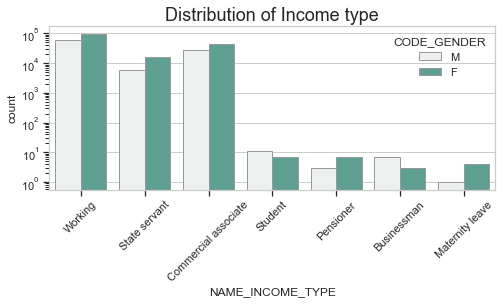

In [44]:
# Plotting for Income type
pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-whitegrid')
sns.set_context('notebook')
plt.figure(figsize=[8,3])

sns.countplot(data=target1_df,x=df['NAME_INCOME_TYPE'],hue=df['CODE_GENDER'],edgecolor=".6",palette='light:#5A9')

plt.title('Distribution of Income type',fontsize=18)
plt.xlabel('NAME_INCOME_TYPE',fontsize=12)

plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observations**
1. Income type ‘working’, ’commercial associate’, and ‘State Servant’ are higher than others.
2. For this Females are having more number  than male.
3. Income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’ are less in number.

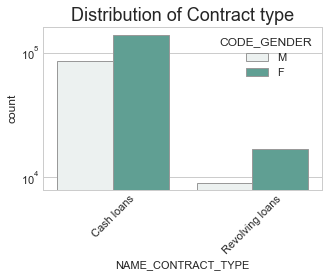

In [45]:
# Plotting for Contract type
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[5,3])

sns.countplot(data=target1_df,x=df['NAME_CONTRACT_TYPE'],hue=df['CODE_GENDER'],color='c',edgecolor=".6",palette='light:#5A9')

plt.title('Distribution of Contract type',fontsize=18)
plt.xlabel('NAME_CONTRACT_TYPE',fontsize=11)

plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observations**
1. Contract type ‘cash loans’ is having higher number  than ‘Revolving loans’ contract type.
2. Female counts are higher than male

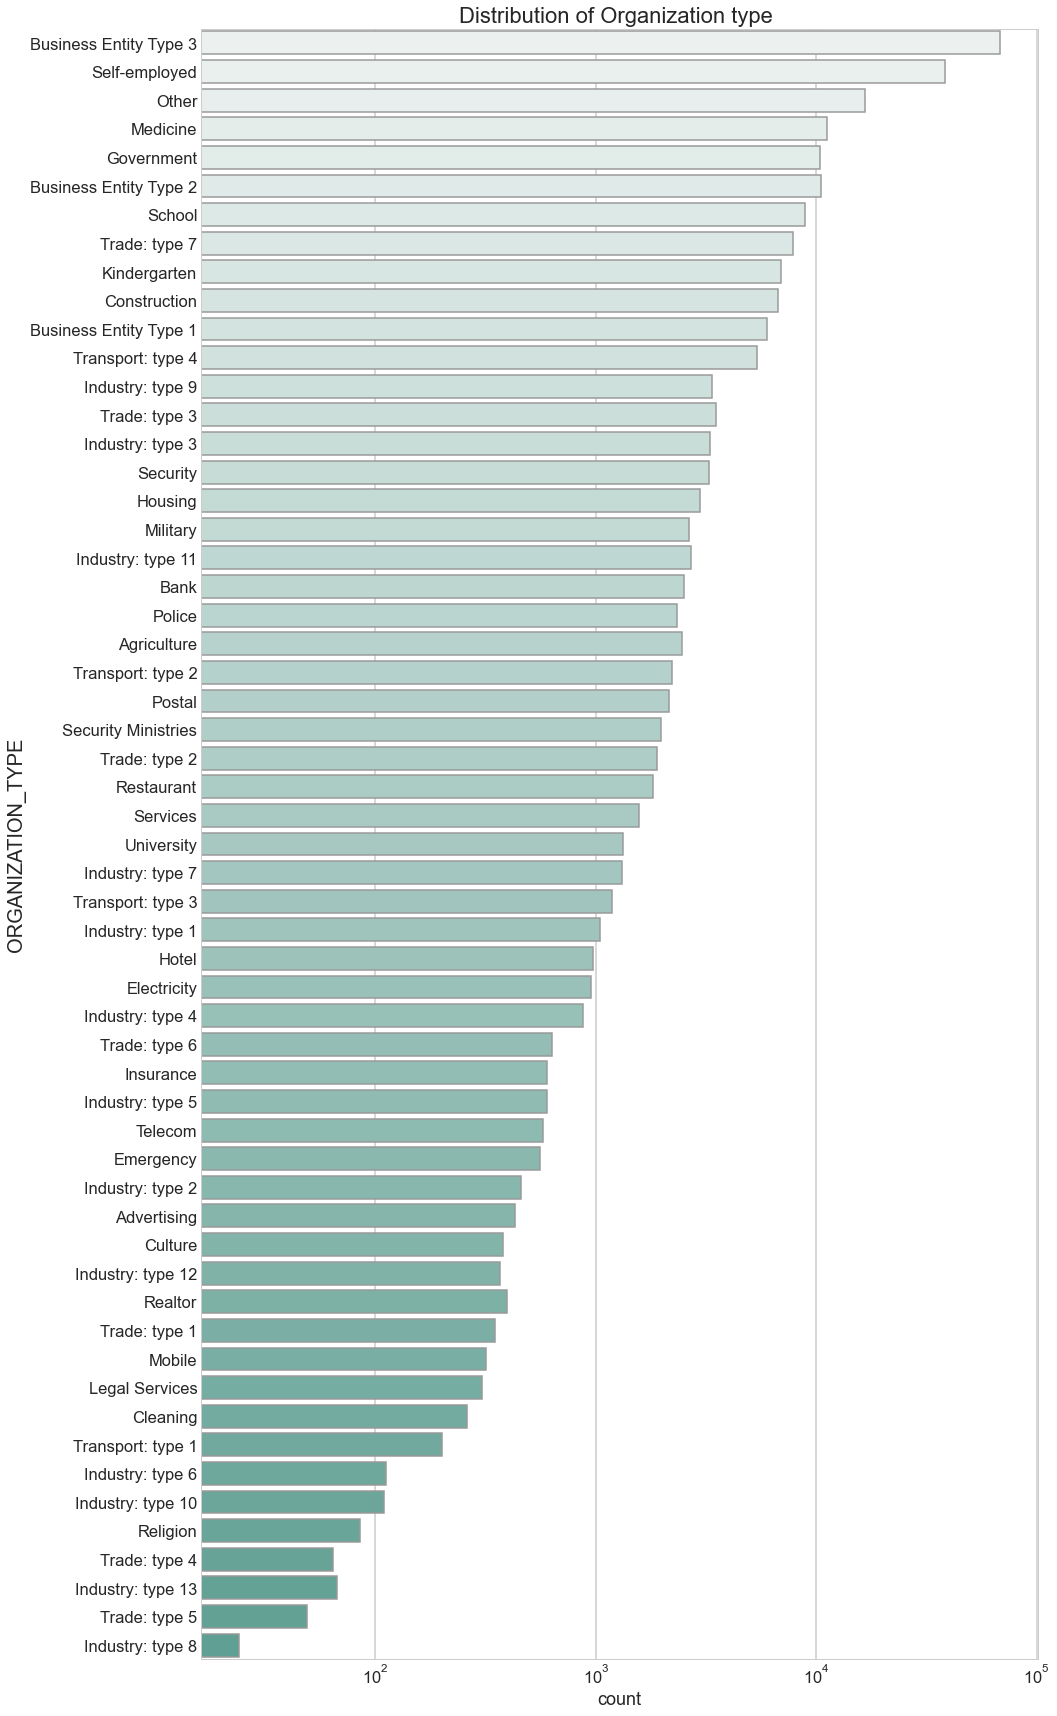

In [46]:
# Plotting for Organization type 
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[15,30])

sns.countplot(data=target1_df,y=df['ORGANIZATION_TYPE'],order=target0_df['ORGANIZATION_TYPE'].value_counts().index,
              color='c',edgecolor=".6",palette='light:#5A9')

plt.title('Distribution of Organization type ',fontsize=22)
plt.ylabel('ORGANIZATION_TYPE',fontsize=20)

plt.xticks(rotation=0)
plt.xscale('log')

plt.show()

**Observations**
1. Most clients are from the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8, Trade type 5, Industry type 13, Trade type 4, Religion and Industry type 10. 

## Univariate analysis for variables

***Finding any outliers for Target 0***

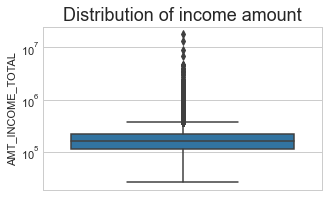

In [47]:
# Distribution of income amount
sns.set_context('notebook')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[5,3])
sns.boxplot(data=target0_df,y='AMT_INCOME_TOTAL')

plt.title('Distribution of income amount',fontsize=18)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=11)

plt.yscale('log') 
plt.show()


**Observations**

* Some outliers are noticed in income amount.
* The third quartiles is very slim for income amount.
* The first quartile is bigger than third quartile which means most clients are from first quartile.


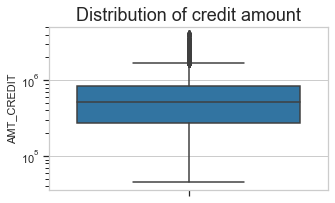

In [48]:
# Disrtibution of credit amount
plt.figure(figsize=[5,3])
sns.set_context('notebook')
sns.boxplot(data=target0_df,y='AMT_CREDIT')
plt.title('Distribution of credit amount',fontsize=18)
plt.ylabel('AMT_CREDIT',fontsize=11)
plt.yscale('log') 
plt.show()

**Observations**

* Some outliers are noticed in credit amount.
* The first quartile is bigger than third quartile for credit amount 
* Most of the credits of clients are present in the first quartile 

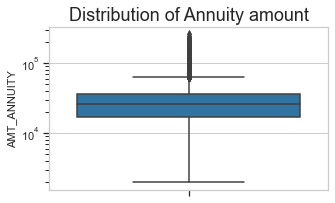

In [49]:
# Distribution of anuuity amount
plt.figure(figsize=[5,3])
sns.set_context('notebook')
sns.boxplot(data=target0_df,y='AMT_ANNUITY')
plt.title('Distribution of Annuity amount',fontsize=18)
plt.ylabel('AMT_ANNUITY',fontsize=11)
plt.yscale('log') 
plt.show()

**Observations**

* Some outliers are noticed in annuity amount.
* The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

***Finding any outliers for Target 1***

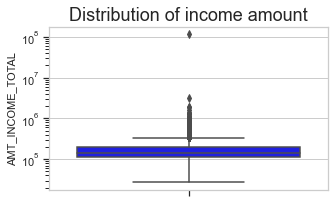

In [50]:
# Distribution of income amount
plt.style.use('seaborn-whitegrid')
sns.set_context('notebook')
plt.figure(figsize=[5,3])

sns.boxplot(data=target1_df,y='AMT_INCOME_TOTAL',color='b')

plt.title('Distribution of income amount',fontsize=18)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=11)
plt.yscale('log') 
plt.show()

**Observations**

* Some outliers are noticed in income amount.
* The third quartiles is very slim for income amount.
* Most of the clients of income are present in first quartile.

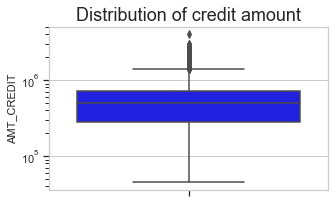

In [51]:
# Disrtibution of credit amount
plt.figure(figsize=[5,3])
sns.set_context('notebook')

sns.boxplot(data=target1_df,y='AMT_CREDIT',color='b')

plt.title('Distribution of credit amount',fontsize=18)
plt.ylabel('AMT_CREDIT',fontsize=11)
plt.yscale('log') 
plt.show()

**Observations**

* Some outliers are noticed in credit amount.
* The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

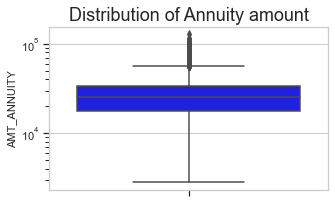

In [52]:
# Distribution of anuuity amount
plt.figure(figsize=[5,3])
sns.set_context('notebook')

sns.boxplot(data=target1_df,y='AMT_ANNUITY',color='b')

plt.title('Distribution of Annuity amount',fontsize=18)
plt.ylabel('AMT_ANNUITY',fontsize=11)
plt.yscale('log') 
plt.show()

**Observations**

* Some outliers are noticed in annuity amount.
* The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### Bivariate analysis 

***For Target 0***

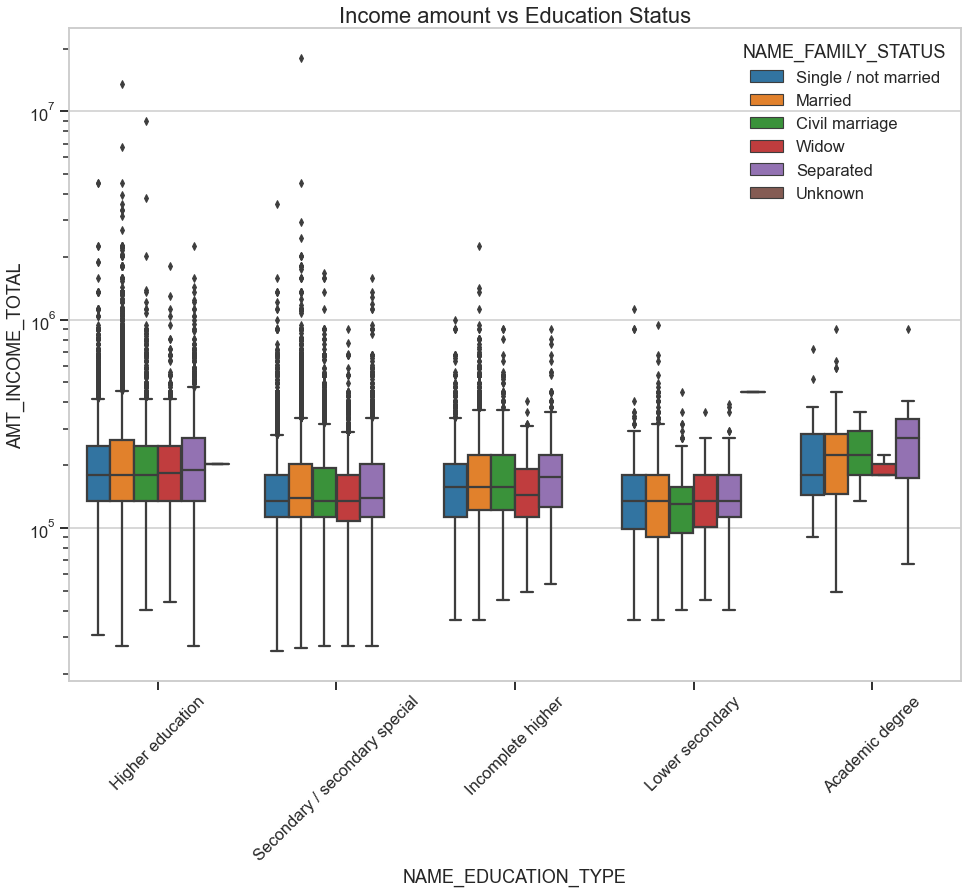

In [53]:
# Box plotting for Income amount in logarithmic scale

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[16,12])
sns.set_context('talk')

sns.boxplot(data=target0_df,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue =df['NAME_FAMILY_STATUS'])

plt.title('Income amount vs Education Status',fontsize=22)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=18)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=18)
plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observation**
* Education type 'Higher education' the income amount is mostly equal with family status.It contains many outliers 
* Less outlier are having for Academic degree but there income amount is little higher than that of Higher education. 
* Lower secondary are have less income amount than others especially of civil marriage family status.

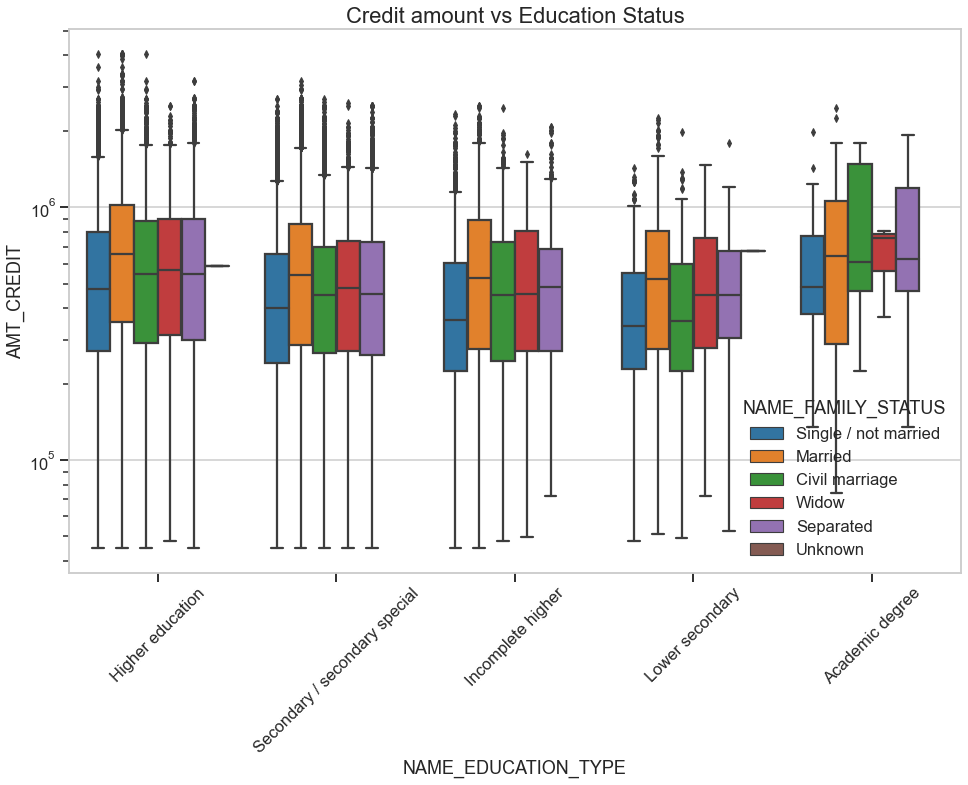

In [56]:
# Box plotting for credit amount
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[16,10])
sns.set_context('talk')

sns.boxplot(data=target0_df,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue =df['NAME_FAMILY_STATUS'])

plt.title('Credit amount vs Education Status',fontsize=22)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=18)
plt.ylabel('AMT_CREDIT',fontsize=18)
plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observation**
* Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. 
* Higher education are having more outliers.
* 'Civil marriage' and 'separated' for Academic degree is having most of the credits in the third quartile.

***For Target 1***

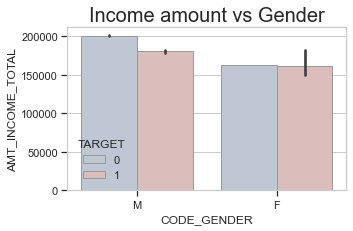

In [62]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[5,3])
sns.set_context('notebook')

sns.barplot(data =df,x=df['CODE_GENDER'], y=df['AMT_INCOME_TOTAL'],hue=df['TARGET'],
           edgecolor=".6",palette='vlag')

plt.title('Income amount vs Gender',fontsize=20)
plt.xlabel('CODE_GENDER',fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=12)
plt.xticks(rotation=45)
plt.xticks(rotation=0)
plt.show()

**Observation**
* Females defaulters as well as payee are equal
* Males has the higher percentage of payee than defaulter 

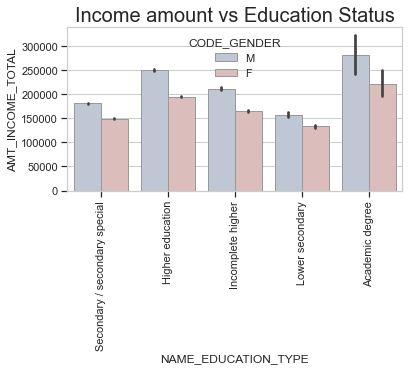

In [64]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,3])
sns.set_context('notebook')

sns.barplot(data =target1_df,x=df['NAME_EDUCATION_TYPE'], y=df['AMT_INCOME_TOTAL'],hue=df['CODE_GENDER'],
           edgecolor=".6",palette='vlag')

plt.title('Income amount vs Education Status',fontsize=20)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=12)

plt.xticks(rotation=90)
plt.show()

**Observations**
* Males irrespective of the education status and total income they earn which is slightly higher than females default more than females.


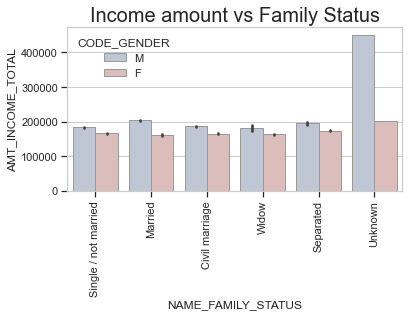

In [65]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,3])
sns.set_context('notebook')

sns.barplot(data =target1_df,x=df['NAME_FAMILY_STATUS'], y=df['AMT_INCOME_TOTAL'],hue=df['CODE_GENDER'],
           edgecolor=".6",palette='vlag')

plt.title('Income amount vs Family Status',fontsize=20)
plt.xlabel('NAME_FAMILY_STATUS',fontsize=12)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=12)

plt.xticks(rotation=90)
plt.show()

**Obbservations**
* Males irrespective of the family status and total income they earn (which is slightly higher than females) default more than females.

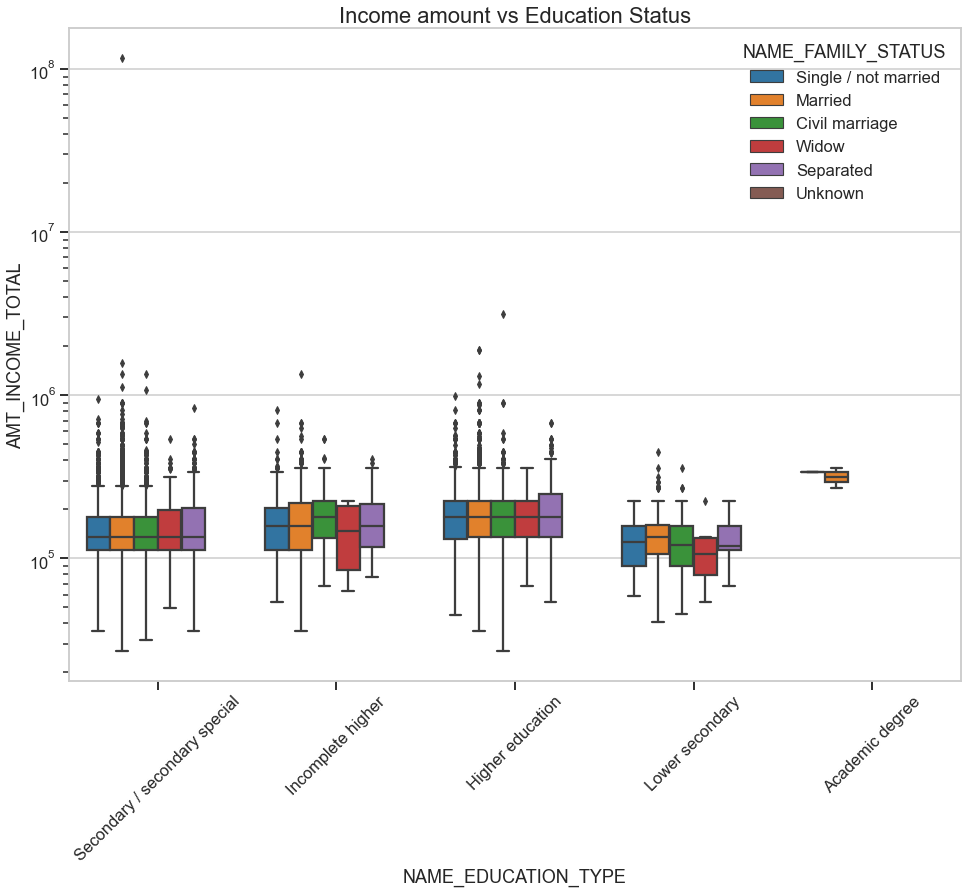

In [66]:
# Box plotting for Income amount in logarithmic scale

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[16,12])
sns.set_context('talk')

sns.boxplot(data=target1_df,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue =df['NAME_FAMILY_STATUS'])

plt.title('Income amount vs Education Status',fontsize=22)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=18)
plt.ylabel('AMT_INCOME_TOTAL',fontsize=18)
plt.xticks(rotation=45)
plt.yscale('log') 
plt.show()

**Observations**

* For Education type 'Higher education' and 'Secondary' the income amount is mostly equal with family status. 
* Less outlier are having for Academic degree, there income amount is little higher that Higher education. There is no data other than single and married
* Lower secondary are have less income amount than others.


***From the obove graphs following conclusions can be drawn:***
* Females defaulters as well as payee are equal in number
* Males has the higher percentage of payee than defaulter 
* Males irrespective of the education status and total income they earn which is slightly higher than females default more than females.
* Males irrespective of the family status and total income they earn (which is slightly higher than females) default more than females.

Academic degree with higher income tend to have more defaulters(males in higher proportion) 

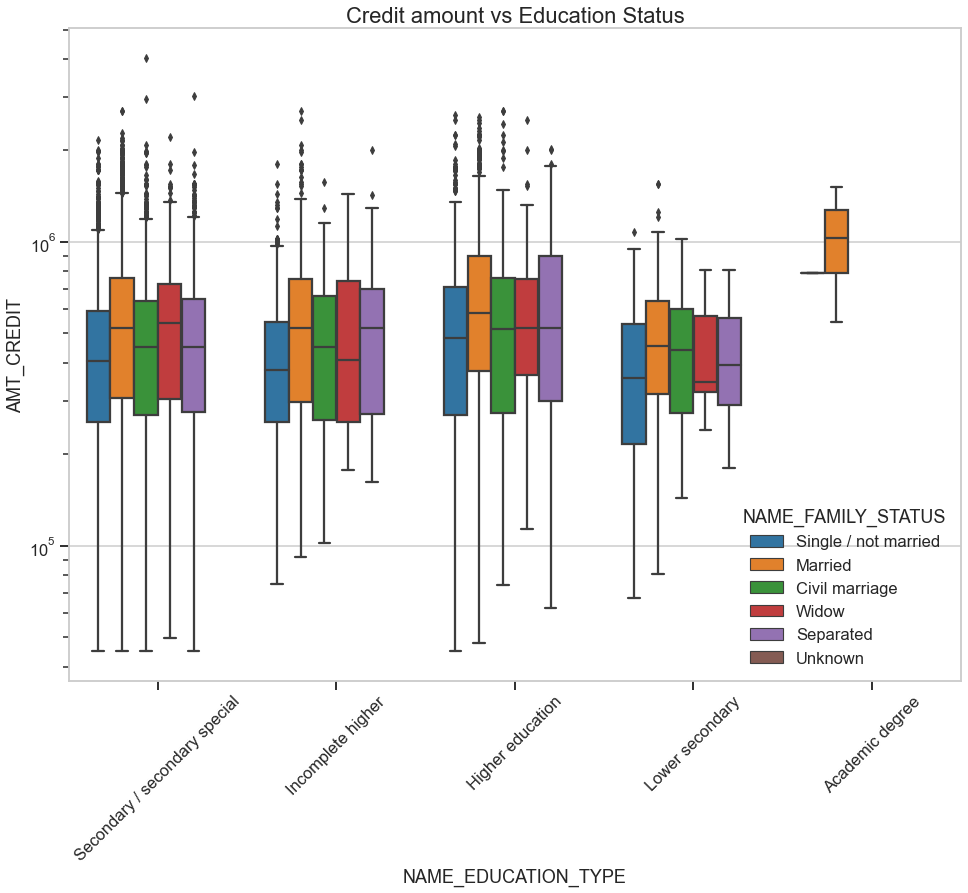

In [101]:
# Box plotting for credit amount
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[16,12])
sns.set_context('talk')

sns.boxplot(data=target1_df,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue =df['NAME_FAMILY_STATUS'])

plt.title('Credit amount vs Education Status',fontsize=22)
plt.xlabel('NAME_EDUCATION_TYPE',fontsize=18)
plt.ylabel('AMT_CREDIT',fontsize=18)
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

**Observation**

* Most of the outliers are from Education type 'Higher education' and 'Secondary'.
* 'Married' for Academic degree is having higher credit than others.There is no data other than single and married


In [105]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='pearson')
target1=target1_corr.corr(method='pearson')

In [107]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.009826,-0.018704,-0.007612,-0.030352,0.242462,0.063036,0.162900,-0.117746,0.893276,-0.033031,-0.023033,-0.016798,-0.006946,-0.001566,0.010369,0.018414
AMT_INCOME_TOTAL,-0.009826,1.000000,0.326155,0.400752,0.169306,-0.045543,-0.030102,0.034508,-0.026462,-0.003133,0.055934,0.064868,0.129765,0.121288,-0.004264,-0.020260,-0.011238
AMT_CREDIT,-0.018704,0.326155,1.000000,0.762103,0.103876,-0.152659,-0.087500,-0.015180,-0.034914,0.036760,0.040390,0.020979,0.050597,0.052028,-0.037527,-0.038517,-0.014834
AMT_ANNUITY,-0.007612,0.400752,0.762103,1.000000,0.122206,-0.091571,-0.052470,0.009814,-0.025990,0.041231,0.034038,0.039753,0.076045,0.071623,-0.018912,-0.028971,-0.014268
REGION_POPULATION_RELATIVE,-0.030352,0.169306,0.103876,0.122206,1.000000,-0.041138,0.008663,-0.059696,-0.004014,-0.028813,0.174754,-0.003262,0.065822,0.092300,-0.053687,-0.049449,-0.017033
DAYS_BIRTH,0.242462,-0.045543,-0.152659,-0.091571,-0.041138,1.000000,0.352662,0.299000,0.108050,0.178013,0.048619,0.058344,0.039298,0.014175,0.165505,0.112517,0.031121
DAYS_EMPLOYED,0.063036,-0.030102,-0.087500,-0.052470,0.008663,0.352662,1.000000,0.172102,0.086679,0.031523,0.022200,0.056714,0.082435,0.063205,0.112019,0.125791,0.074665
DAYS_REGISTRATION,0.162900,0.034508,-0.015180,0.009814,-0.059696,0.299000,0.172102,1.000000,0.029895,0.155681,-0.031501,0.020549,0.017588,0.009254,0.047235,0.055274,0.031350
DAYS_ID_PUBLISH,-0.117746,-0.026462,-0.034914,-0.025990,-0.004014,0.108050,0.086679,0.029895,1.000000,-0.109789,0.005436,0.026744,0.020968,0.008941,0.053424,0.033071,0.001767
CNT_FAM_MEMBERS,0.893276,-0.003133,0.036760,0.041231,-0.028813,0.178013,0.031523,0.155681,-0.109789,1.000000,-0.036576,-0.027397,-0.021705,-0.009412,-0.009021,0.013098,0.028997


In [108]:
# Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.001872,-0.002074,0.015653,-0.032019,0.176563,0.032627,0.126411,-0.089861,0.893829,-0.038923,-0.032465,-0.039498,-0.028031,-0.019278,-0.000876,0.016332
AMT_INCOME_TOTAL,0.001872,1.000000,0.036484,0.043358,0.008476,-0.007822,-0.000039,-0.003959,-0.008858,0.003692,0.012520,0.006951,0.013245,0.012287,-0.003664,-0.006886,-0.004401
AMT_CREDIT,-0.002074,0.036484,1.000000,0.748708,0.069220,-0.189512,-0.106003,-0.033250,-0.062405,0.045420,0.029054,0.020083,0.035695,0.035966,-0.035325,-0.041392,-0.017875
AMT_ANNUITY,0.015653,0.043358,0.748708,1.000000,0.074406,-0.090497,-0.049032,0.014302,-0.044289,0.054884,0.022524,0.033311,0.063242,0.061609,-0.013834,-0.019728,-0.006806
REGION_POPULATION_RELATIVE,-0.032019,0.008476,0.069220,0.074406,1.000000,-0.049958,-0.015758,-0.055746,-0.011965,-0.030847,0.144049,-0.021946,0.025422,0.050773,-0.060398,-0.053718,-0.019017
DAYS_BIRTH,0.176563,-0.007822,-0.189512,-0.090497,-0.049958,1.000000,0.307018,0.241202,0.135519,0.110353,0.034990,0.044508,0.022145,0.000483,0.142376,0.096474,0.012044
DAYS_EMPLOYED,0.032627,-0.000039,-0.106003,-0.049032,-0.015758,0.307018,1.000000,0.137454,0.096559,-0.001630,0.000092,0.059212,0.075389,0.054503,0.113374,0.134581,0.071026
DAYS_REGISTRATION,0.126411,-0.003959,-0.033250,0.014302,-0.055746,0.241202,0.137454,1.000000,0.049891,0.123583,-0.048209,0.010866,0.004578,0.000767,0.028759,0.049148,0.028976
DAYS_ID_PUBLISH,-0.089861,-0.008858,-0.062405,-0.044289,-0.011965,0.135519,0.096559,0.049891,1.000000,-0.088621,0.008774,0.025320,0.013408,0.002667,0.047784,0.016251,-0.014871
CNT_FAM_MEMBERS,0.893829,0.003692,0.045420,0.054884,-0.030847,0.110353,-0.001630,0.123583,-0.088621,1.000000,-0.040184,-0.034419,-0.045532,-0.033116,-0.023800,0.000693,0.026055


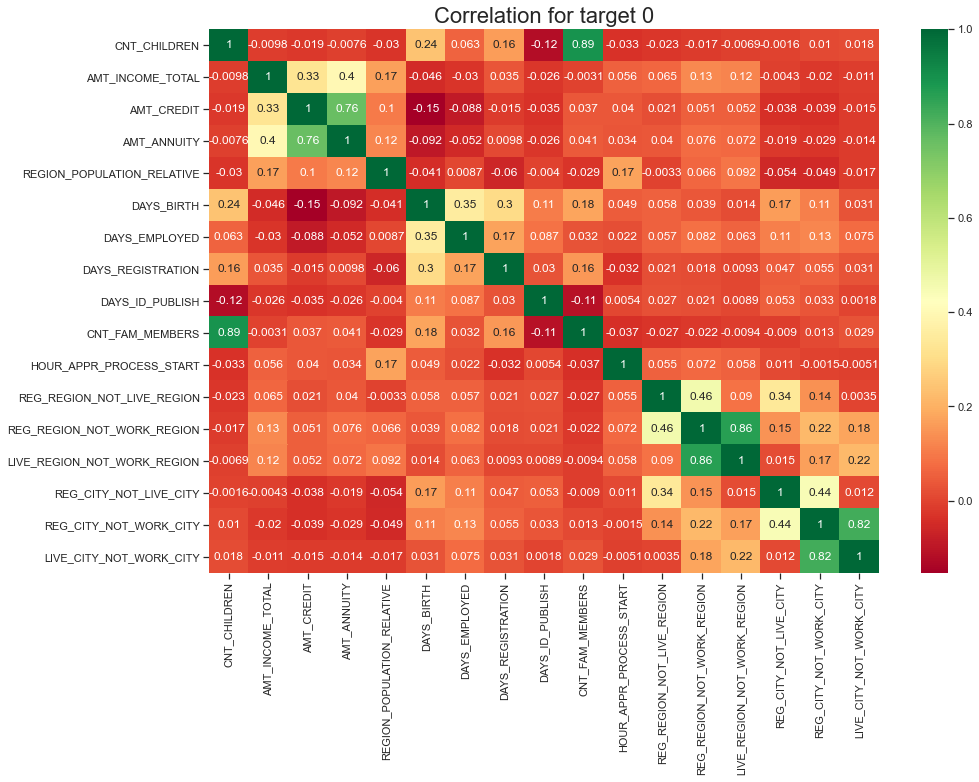

In [110]:
plt.figure(figsize=(15,10))
sns.set_context('notebook')
sns.heatmap(data=target0, cmap="RdYlGn",annot=True)
plt.title('Correlation for target 0',fontsize=22)
plt.yticks(rotation=0)
plt.show()

* Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
* Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
* Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
* less children client have in densely populated area.
* Credit amount is higher to densely populated area.
* The income is also higher in densely populated area.

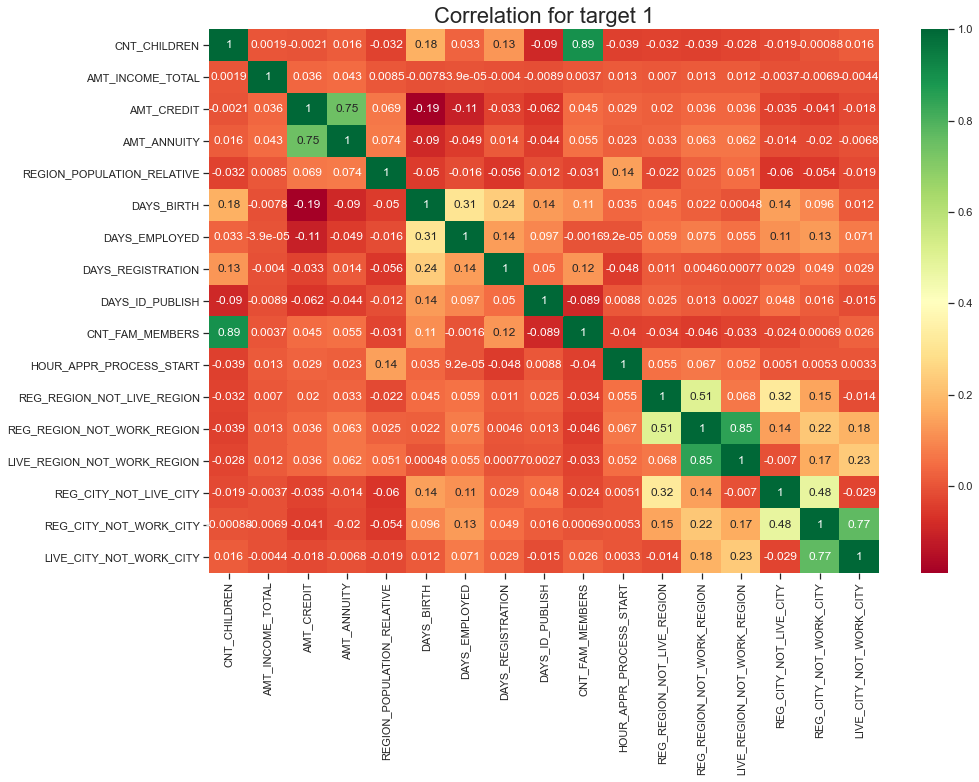

In [111]:
plt.figure(figsize=(15, 10))
sns.set_context('notebook')
sns.heatmap(data=target1, cmap="RdYlGn",annot=True)
plt.title('Correlation for target 1',fontsize=22)
plt.yticks(rotation=0)
plt.show()


This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

The client's permanent address does not match contact address are having less children and vice-versa
the client's permanent address does not match work address are having less children and vice-versa

## Previous application dataset

In [112]:
# Reading the dataset of previous application
df1=pd.read_csv('previous_application.csv')
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Check the number of rows and columns in the dataframe
df1.shape

(1670214, 37)

In [114]:
#check for duplicate value
df1.duplicated().sum()

0

In [115]:
# Check for the null values
df1.isnull().sum()

SK_ID_PREV                     0      
SK_ID_CURR                     0      
NAME_CONTRACT_TYPE             0      
AMT_ANNUITY                    372235 
AMT_APPLICATION                0      
AMT_CREDIT                     1      
AMT_DOWN_PAYMENT               895844 
AMT_GOODS_PRICE                385515 
WEEKDAY_APPR_PROCESS_START     0      
HOUR_APPR_PROCESS_START        0      
FLAG_LAST_APPL_PER_CONTRACT    0      
NFLAG_LAST_APPL_IN_DAY         0      
RATE_DOWN_PAYMENT              895844 
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE         0      
NAME_CONTRACT_STATUS           0      
DAYS_DECISION                  0      
NAME_PAYMENT_TYPE              0      
CODE_REJECT_REASON             0      
NAME_TYPE_SUITE                820405 
NAME_CLIENT_TYPE               0      
NAME_GOODS_CATEGORY            0      
NAME_PORTFOLIO                 0      
NAME_PRODUCT_TYPE              0      
CHANNEL_TYPE             

In [116]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df1.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

15

In [117]:
# Removing those 15 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df1.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

15


In [118]:
df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [119]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

***Merging the previous application dataset with application dataset***

In [120]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,75000-100000,150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [121]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT',
                         'AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START',
                         'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [122]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
              'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 
              'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 
              'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

### Univariate analysis

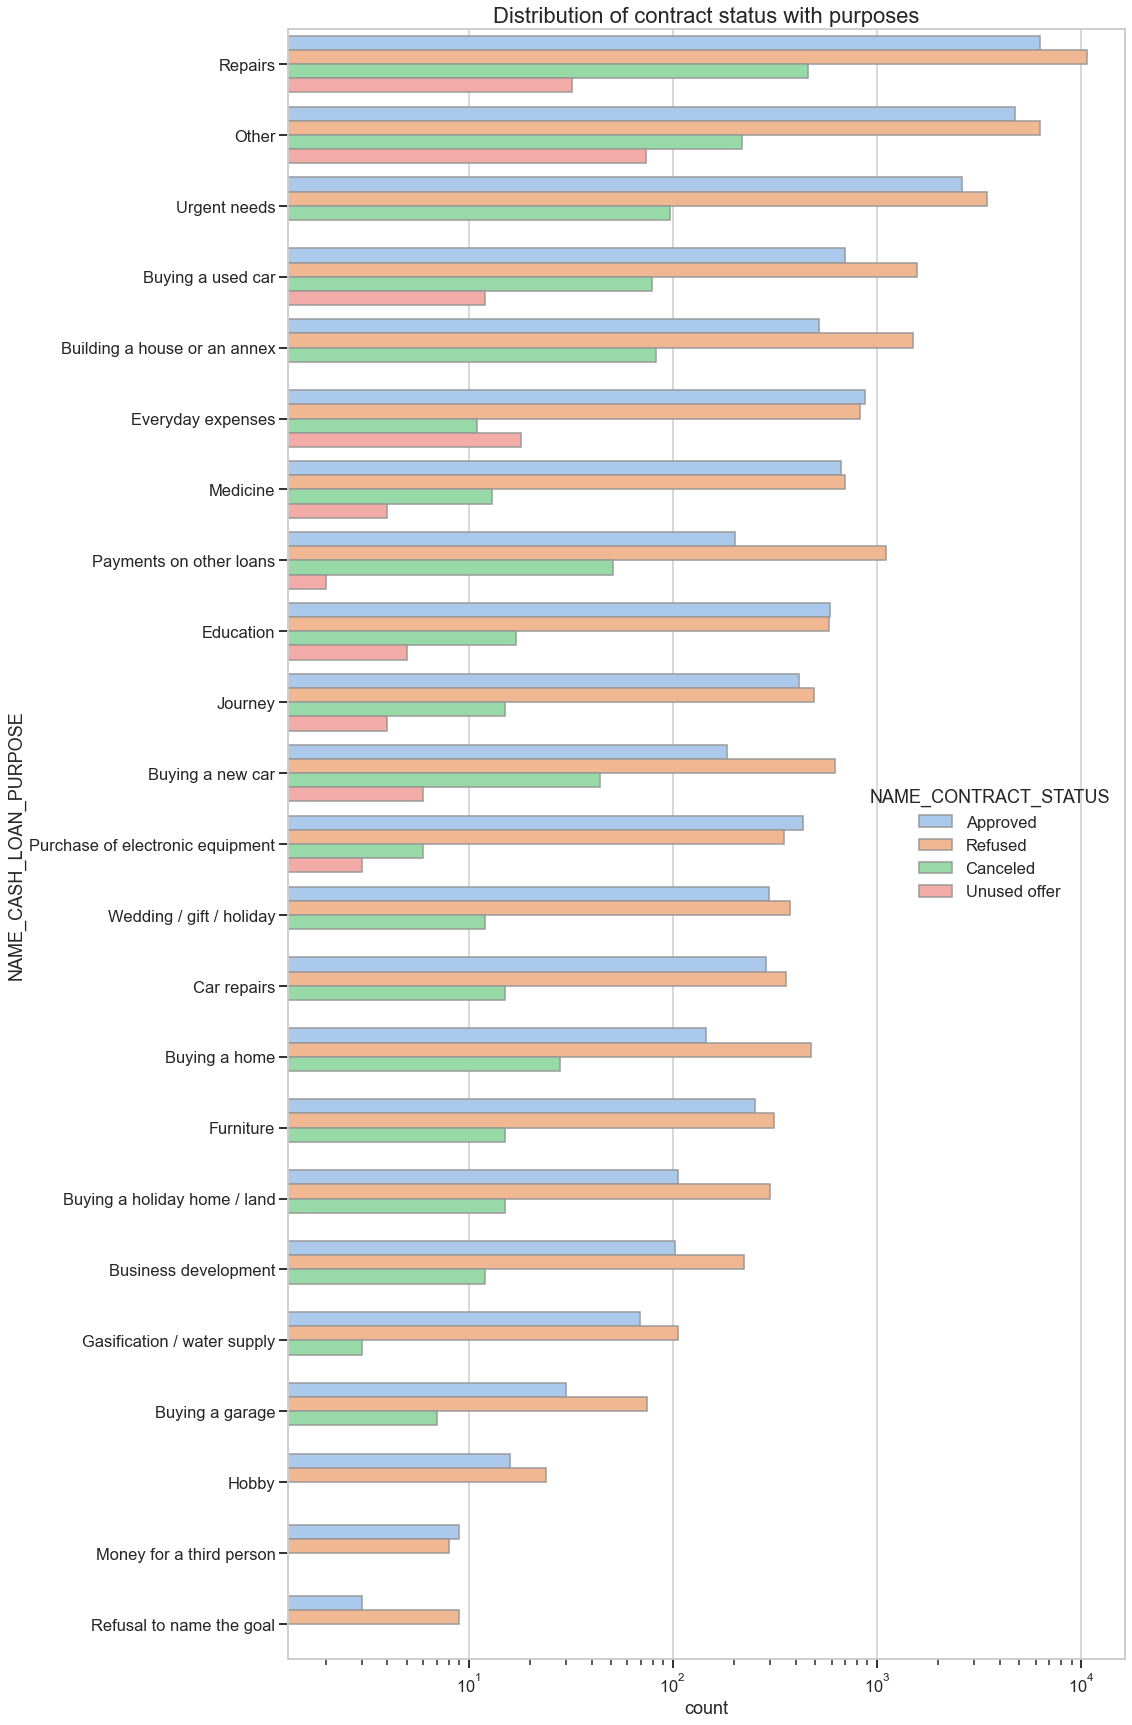

In [123]:
# Distribution of contract status

pd.set_option('display.max_colwidth', -1)
sns.set_context('talk')
plt.figure(figsize=[15,30])

sns.countplot(data=new_df1, y= 'NAME_CASH_LOAN_PURPOSE',order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'NAME_CONTRACT_STATUS',edgecolor=".6",palette="pastel")

plt.title('Distribution of contract status with purposes',fontsize=22)
plt.ylabel('NAME_CASH_LOAN_PURPOSE',fontsize=18)
plt.xticks(rotation=0)
plt.xscale('log')
plt.show()

**Observations**

* Most rejection of loans came from purpose 'repairs'.
* For education purposes we have equal number of approves and rejection
* Paying other loans and buying a new car is having significant higher rejection than approves.

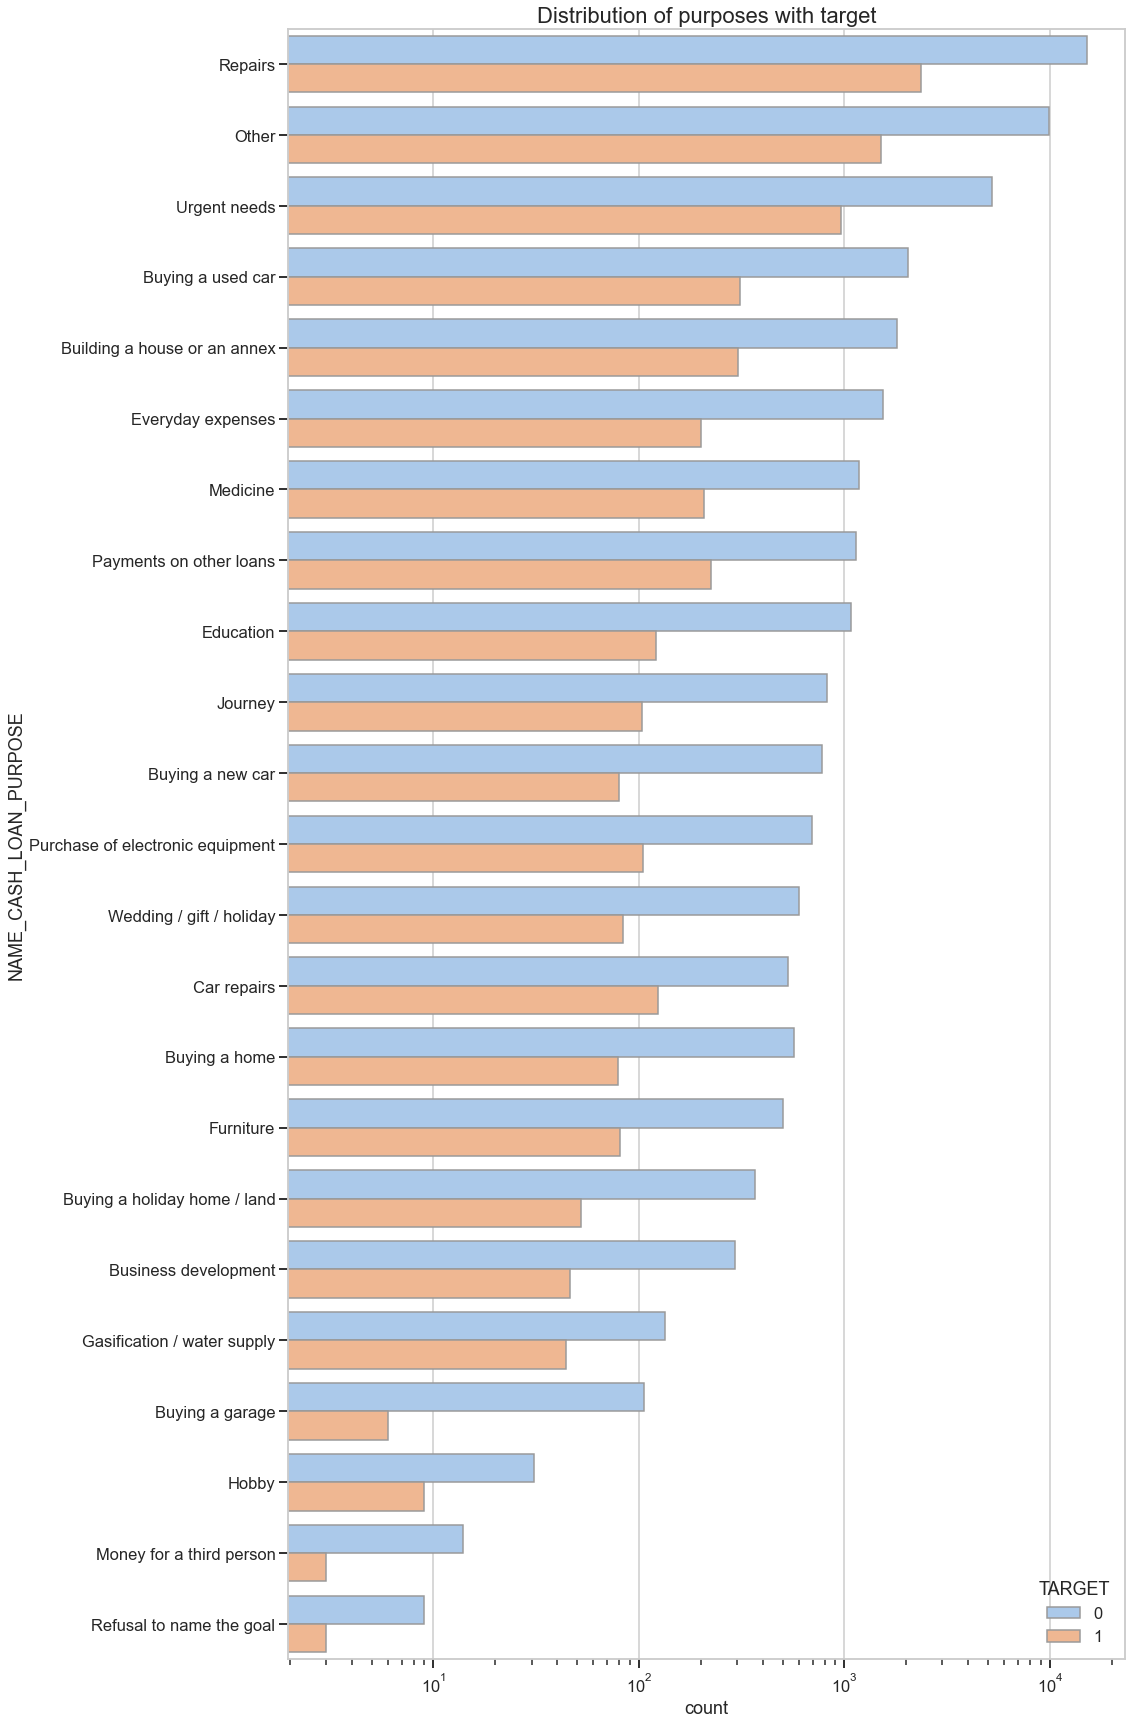

In [124]:
# Distribution of contract status

pd.set_option('display.max_colwidth', -1)
sns.set_context('talk')
plt.figure(figsize=[15,30])

sns.countplot(data=new_df1, y= 'NAME_CASH_LOAN_PURPOSE',order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              hue = 'TARGET',edgecolor=".6",palette="pastel")

plt.title('Distribution of purposes with target',fontsize=22)
plt.ylabel('NAME_CASH_LOAN_PURPOSE',fontsize=18)
plt.xticks(rotation=0)
plt.xscale('log')
plt.show()

**Observations**
* Loan purposes with 'Repairs' are facing more difficulites in payment on time.
* There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'.

*Hence we can focus on these purposes for which the client is having for minimal payment difficulties.*

### Bivariate analysis

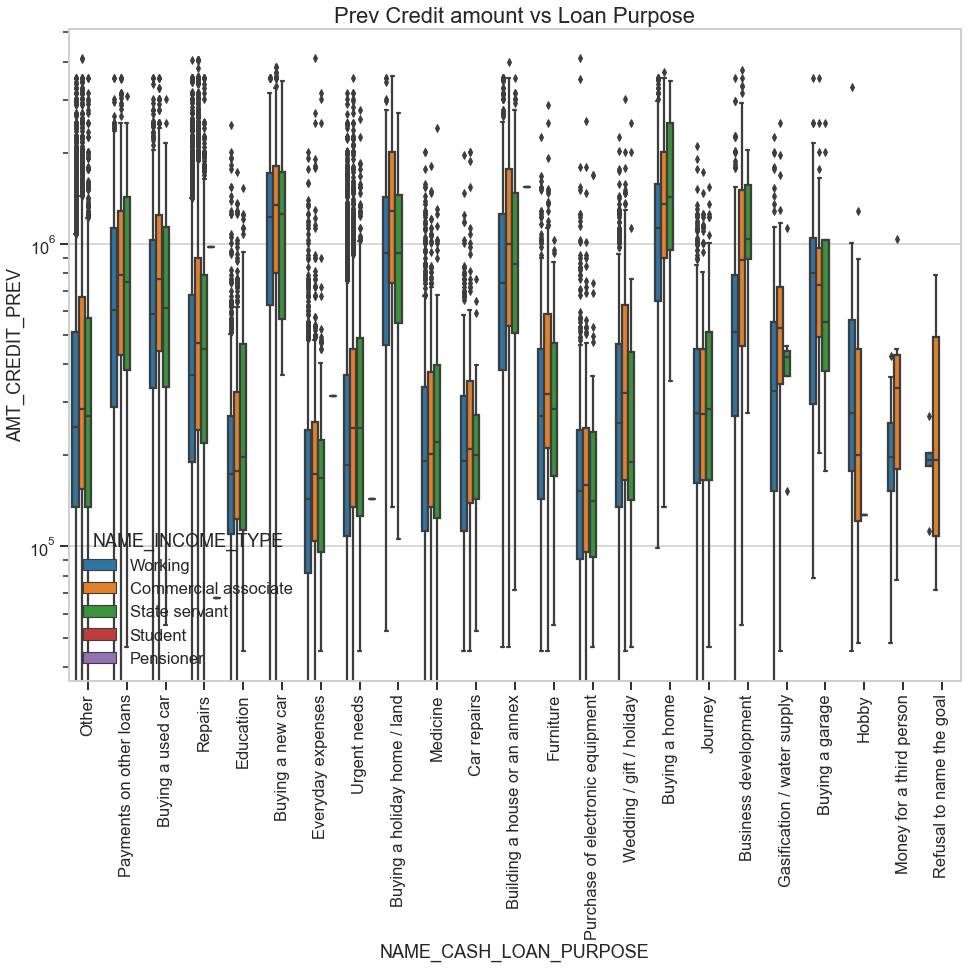

In [125]:
# Box plotting for Credit amount in logarithmic scale

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[16,12])
sns.set_context('talk')

sns.boxplot(data=new_df1,x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT_PREV',hue ='NAME_INCOME_TYPE')

plt.title('Prev Credit amount vs Loan Purpose',fontsize=22)
plt.xlabel('NAME_CASH_LOAN_PURPOSE',fontsize=18)
plt.ylabel('AMT_CREDIT_PREV',fontsize=18)
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

**Observation**
* The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
* The credit amount of Loan purposes like 'Everyday eexpenses'and'Purchase of electronic equipment' is lower.
* Money for 'third person' or a 'Hobby' is having less credits applied for.

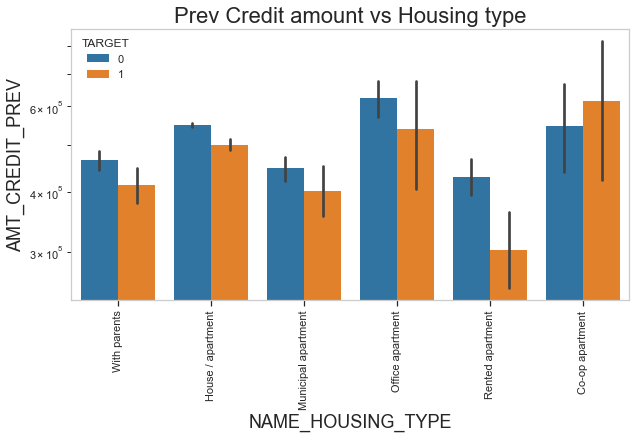

In [126]:
#  Credit amount prev vs Housing type in logarithmic scale


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[10,5])
sns.set_context('notebook')

sns.barplot(data =new_df1,x='NAME_HOUSING_TYPE', y='AMT_CREDIT_PREV',hue='TARGET')

plt.title('Prev Credit amount vs Housing type',fontsize=22)
plt.xlabel('NAME_HOUSING_TYPE',fontsize=18)
plt.ylabel('AMT_CREDIT_PREV',fontsize=18)
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

**Observations**

For housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. 
1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. 
2. Bank can focus mostly on housing type with parents or House\appartment or muncipal appartment for successful payments.

## CONCLUSION
**TARGET**
* Banks should focus more on contract type `‘Student’ ,‘pensioner’ and ‘Businessman’` for successful payments.
*  Get as much as clients from housing type ‘`With parents’or House\appartment or muncipal appartment` as they are having least number of unsuccessful payments.

**RECONSIDER FOLLOWING**
1. Banks should focus less on income type `‘Working’` as they are having most number of unsuccessful payments.
2. Also with loan purpose `‘Repair’` is having higher number of unsuccessful payments on time.
3. Bank should avoid giving loans to the housing type of `co-op apartment` as they are having difficulties in payment.
4. Educational staus `'academic degree' `having `higher income`tend to default the loans more.